In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm 
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA 
colors = ["blue", "red", "green", "orange"]

In [116]:
# read in the dataset
data = pd.read_csv("webmd_Cleaneddataset2.csv", header = 1, index_col = 0)

# subset the drug data
medications = data[["Drug Name", "Overall rating", "effectiveness_5", "effectiveness_4", "effectiveness_3", "effectiveness_2", "effectiveness_1", "ease_of_use_5", "ease_of_use_4", "ease_of_use_3", "ease_of_use_2", "ease_of_use_1", "satisfaction_5", "satisfaction_4", "satisfaction_3", "satisfaction_2", "satisfaction_1"]]
# remove the na values and reset indices
medications = medications.dropna()
medications = medications.reset_index()

# subset the patient data
patients = data[["Drug Name", "Name", "Age Range", "Gender", "Duration", "Patient Type", "condition", "Individual rating", "Comments"]]
# fill in the missing drug information
patients = patients.fillna(method = "ffill")

full_data = data.fillna(method = "ffill")
full_data = full_data.rename(columns={"Overall rating":"Overall_rating", "Drug Name":"Drug_name","Age Range":"Age_range", "Patient Type":"Patient_type","Individual rating":"Individual_rating"})

# Descriptive Statistics

In [41]:
# calculate summary statistics for the medications

medications.describe()

,index,Overall rating,effectiveness_5,effectiveness_4,effectiveness_3,effectiveness_2,effectiveness_1,ease_of_use_5,ease_of_use_4,ease_of_use_3,ease_of_use_2,ease_of_use_1,satisfaction_5,satisfaction_4,satisfaction_3,satisfaction_2,satisfaction_1
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,700.000000,3.539437,382.140845,270.873239,198.746479,98.478873,179.591549,617.901408,233.042254,123.492958,51.295775,104.098592,340.619718,208.478873,172.661972,109.112676,298.957746
std,412.795349,0.375111,378.494208,281.084478,206.448521,97.063876,177.149056,623.460508,238.307930,120.289160,47.174871,100.196543,345.081041,223.643713,177.175695,106.812192,299.858749
min,0.000000,2.500000,25.000000,11.000000,4.000000,4.000000,2.000000,33.000000,9.000000,2.000000,1.000000,1.000000,20.000000,9.000000,6.000000,4.000000,7.000000
25%,350.000000,3.400000,129.500000,98.000000,81.500000,38.500000,65.000000,184.500000,97.500000,49.500000,21.000000,36.000000,103.500000,60.000000,64.500000,45.500000,108.000000
50%,700.000000,3.600000,235.000000,148.000000,123.000000,65.000000,110.000000,353.000000,134.000000,81.000000,34.000000,64.000000,199.000000,114.000000,101.000000,72.000000,201.000000
75%,1050.000000,3.800000,532.000000,366.500000,241.000000,107.000000,247.500000,882.000000,293.000000,149.500000,60.000000,145.500000,498.000000,282.000000,227.000000,129.500000,397.500000
max,1400.000000,4.300000,1746.000000,1149.000000,955.000000,438.000000,968.000000,2768.000000,1026.000000,573.000000,189.000000,490.000000,1574.000000,982.000000,786.000000,523.000000,1540.000000


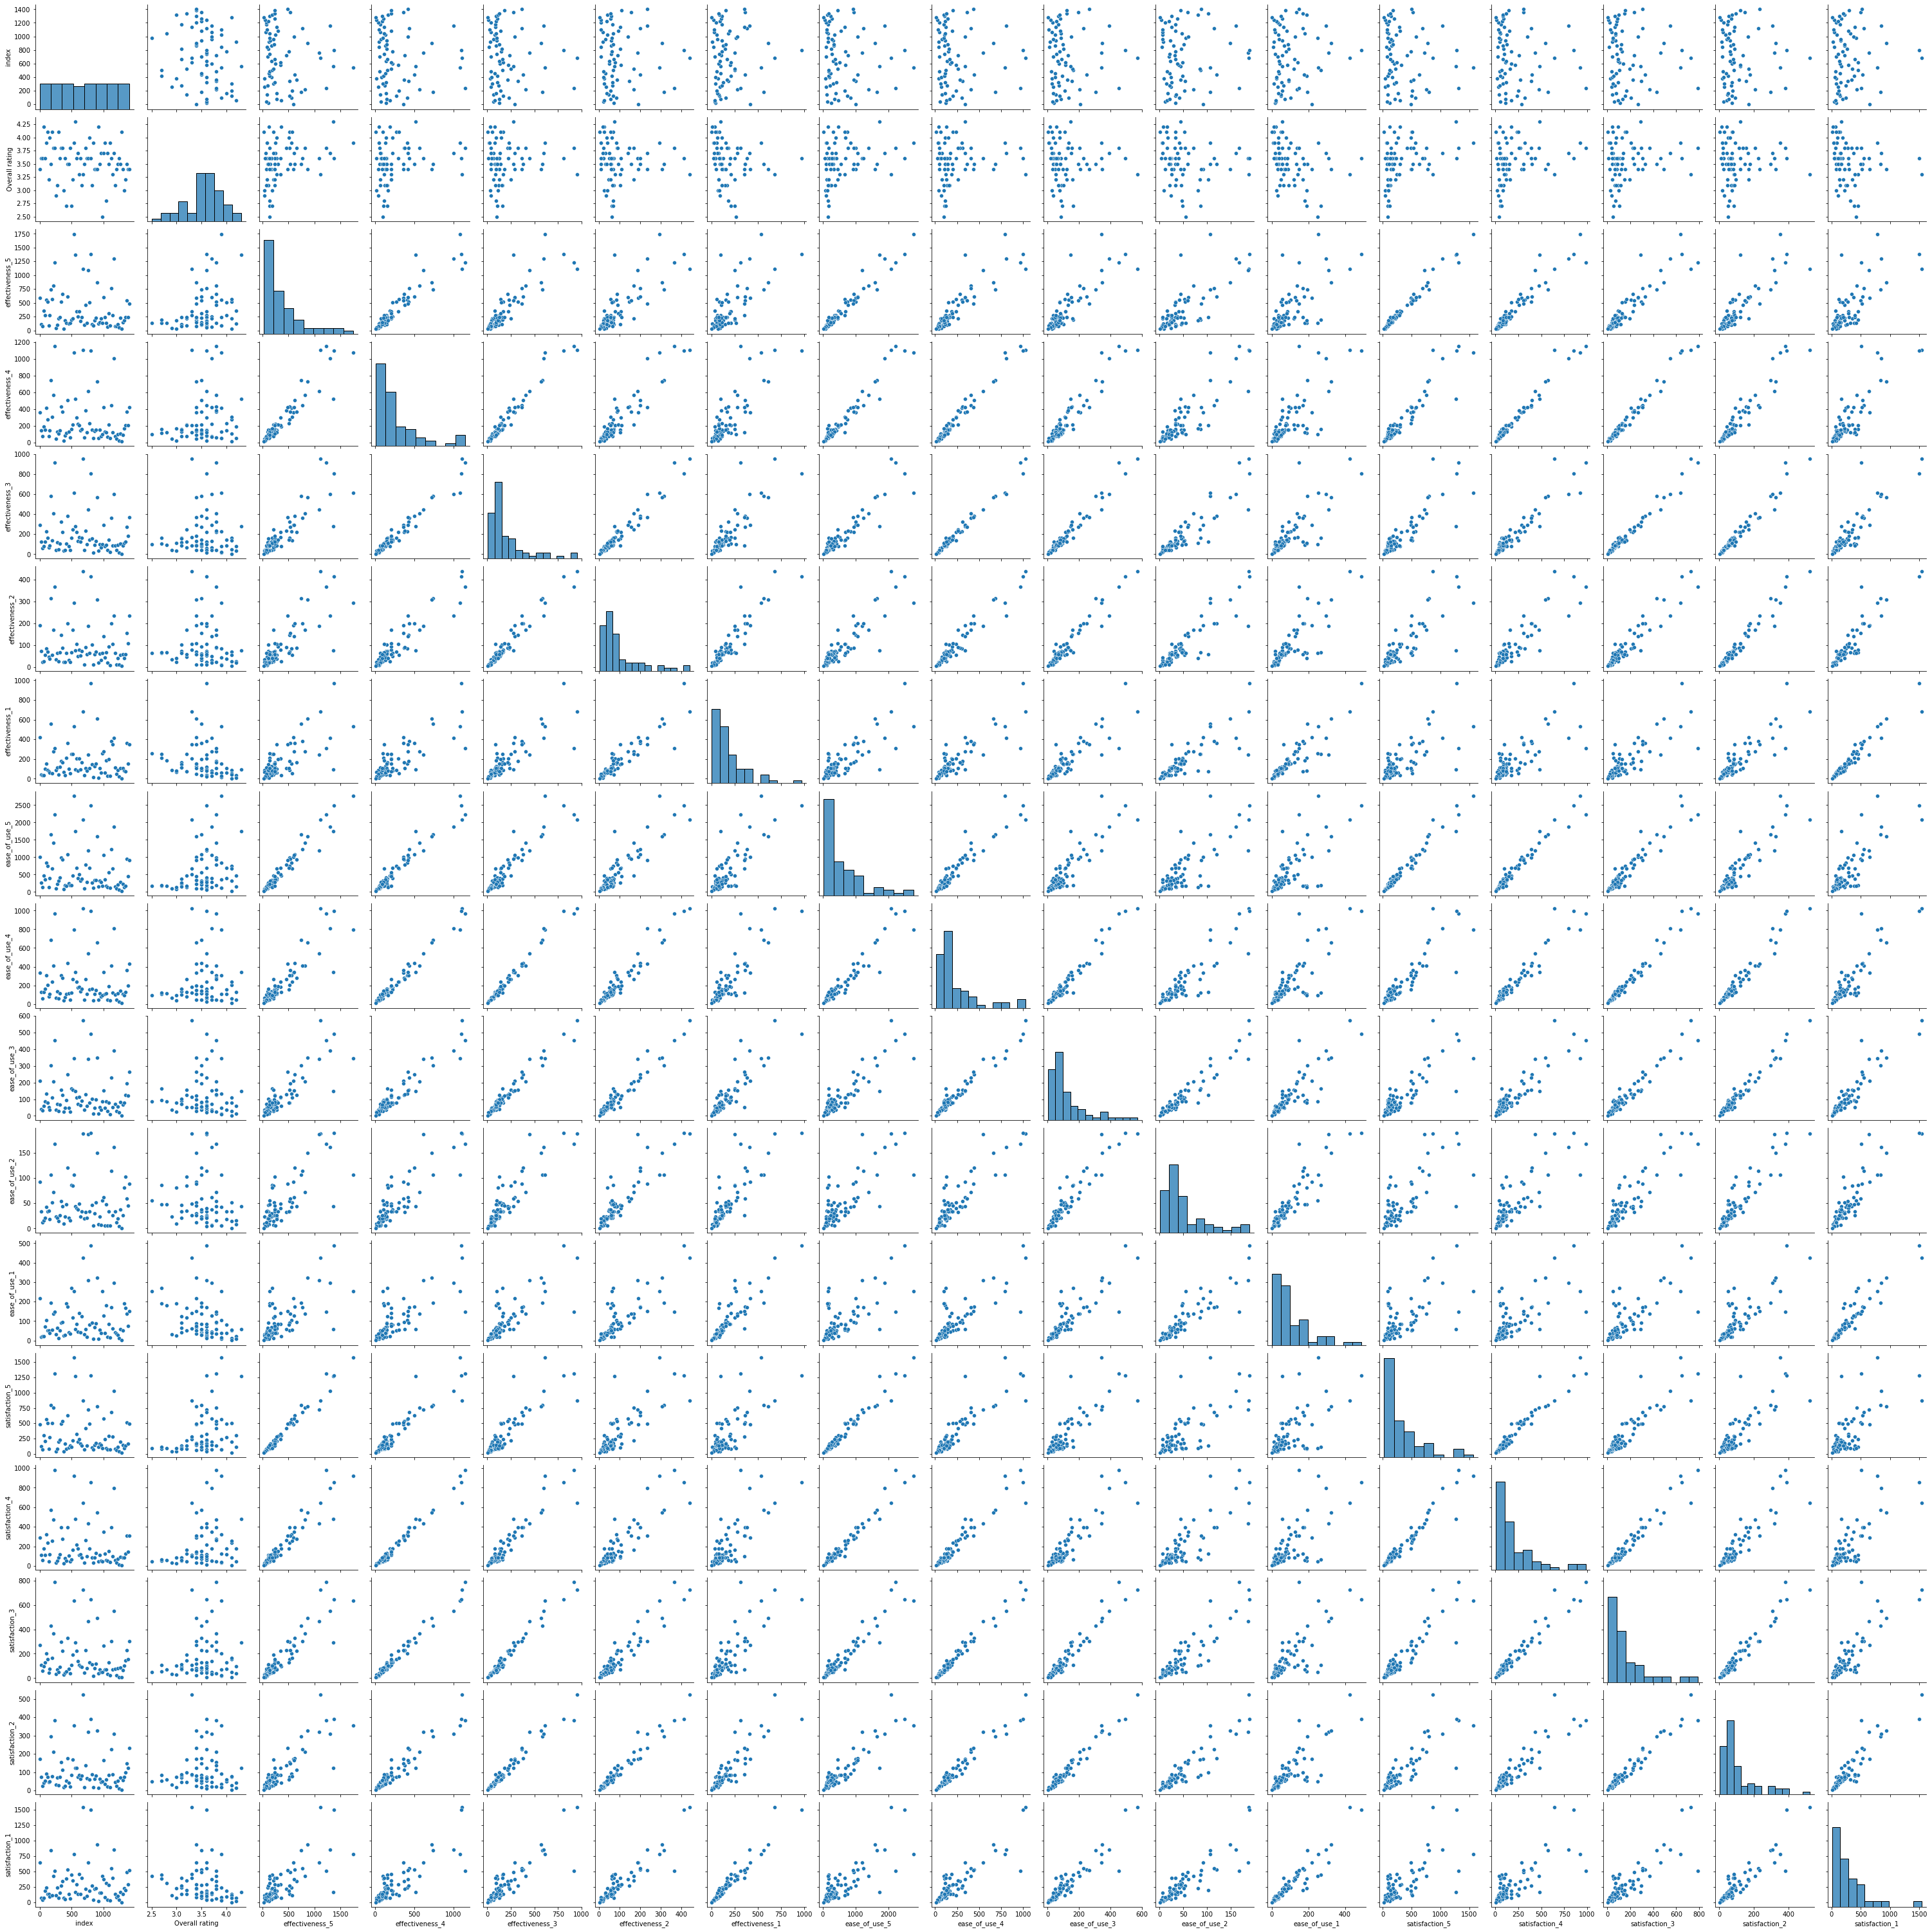

In [44]:
# look at a correlation matrix

sns.pairplot(data=medications)

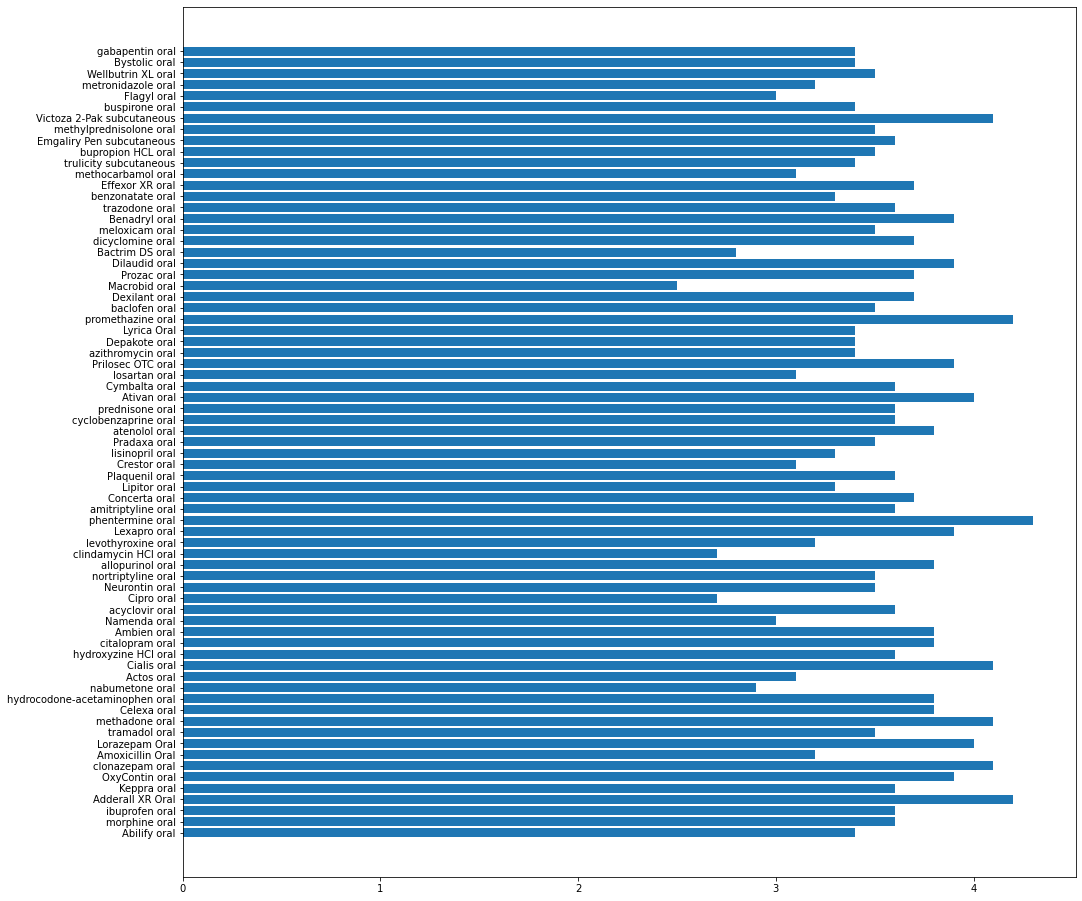

In [39]:
# plot the overall ratings of each drug

fig, ax = plt.subplots(figsize =(16, 16))
ax.barh(medications["Drug Name"], medications["Overall rating"])
plt.show()

# Linear Models

In [60]:
# rename the column without spaces
medications = medications.rename(columns={'Overall rating': 'Overall_rating'})

# Model 1 = Overall Rating ~ Effectiveness [1:5], Ease of Use [1:5], Satisfaction [1:5]
model1 = sm.ols(formula = "Overall_rating ~ effectiveness_5 + ease_of_use_5 + satisfaction_5 + effectiveness_4 + ease_of_use_4 + satisfaction_4 + effectiveness_3 + ease_of_use_3 + satisfaction_3 + effectiveness_2 + ease_of_use_2 + satisfaction_2 +effectiveness_1 + ease_of_use_1 + satisfaction_1", data=medications).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Overall_rating   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     8.114
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           7.00e-09
Time:                        14:20:13   Log-Likelihood:                 6.5636
No. Observations:                  71   AIC:                             14.87
Df Residuals:                      57   BIC:                             46.55
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5700      0.048     74.653      0.000       3.474       3.666
effectiveness_5     0.0005      0.001      0.708      0.482      -0.001       0.002
ease_of_use_5       0.0004      0.000      0.948      0.347      -0.000       0.001
satisfaction_5  -7.523e-05      0.001     -0.078      0.938      -0.002       0.002
effectiveness_4     0.0010      0.002      0.589      0.558      -0.002       0.004
ease_of_use_4       0.0015      0.002      0.838      0.406      -0.002       0.005
satisfaction_4     -0.0014      0.002     -0.826      0.412      -0.005       0.002
effectiveness_3    -0.0015      0.002     -0.771      0.444      -0.005       0.002
ease_of_use_3      -0.0014      0.003     -0.493      0.624      -0.007       0.004
satisfaction_3      0.0011      0.002      0.492      0.625      -0.003       0.006
effectiveness_2    -0.0007      0.003     -0.200      0.842      -0.007       0.006
ease_of_use_2       0.0016      0.003      0.519      0.605      -0.005       0.008
satisfaction_2     -0.0016      0.003     -0.619      0.539      -0.007       0.003
effectiveness_1    -0.0007      0.002     -0.455      0.651      -0.004       0.002
ease_of_use_1      -0.0037      0.002     -2.084      0.042      -0.007      -0.000
satisfaction_1      0.0005      0.001      0.479      0.634      -0.002       0.002
==============================================================================
Omnibus:                        0.776   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.678   Jarque-Bera (JB):                0.275
Skew:                          -0.054   Prob(JB):                        0.871
Kurtosis:                       3.285   Cond. No.                     1.02e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.41e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [74]:
model2 = sm.ols(formula = "Overall_rating ~ Individual_rating", data = full_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Overall_rating   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     162.4
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           2.72e-35
Time:                        14:25:47   Log-Likelihood:                -535.49
No. Observations:                1420   AIC:                             1075.
Df Residuals:                    1418   BIC:                             1085.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.2587      0.024    136.098      0.000       3.212       3.306
Individual_rating     0.0822      0.006     12.743      0.000       0.070       0.095
==============================================================================
Omnibus:                       40.829   Durbin-Watson:                   0.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.712
Skew:                          -0.414   Prob(JB):                     3.22e-10
Kurtosis:                       3.234   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
# create a dummy variable for patient type
full_data["Patient"] = full_data["Patient_type"].map({"Patient":1, "Caregiver":0})

model3 = sm.ols(formula = "Overall_rating ~ Patient", data = full_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Overall_rating   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     162.4
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           2.72e-35
Time:                        14:56:41   Log-Likelihood:                -535.49
No. Observations:                1420   AIC:                             1075.
Df Residuals:                    1418   BIC:                             1085.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.2587      0.024    136.098      0.000       3.212       3.306
Individual_rating     0.0822      0.006     12.743      0.000       0.070       0.095
==============================================================================
Omnibus:                       40.829   Durbin-Watson:                   0.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.712
Skew:                          -0.414   Prob(JB):                     3.22e-10
Kurtosis:                       3.234   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Principal Component Analysis

In [136]:
X = medications[["Overall rating", "effectiveness_5", "effectiveness_4", "effectiveness_3", "effectiveness_2", "effectiveness_1", "ease_of_use_5", "ease_of_use_4", "ease_of_use_3", "ease_of_use_2", "ease_of_use_1", "satisfaction_5", "satisfaction_4", "satisfaction_3", "satisfaction_2", "satisfaction_1"]]
y = medications["Drug Name"]

pca_model = PCA()
X_PCA = pca_model.fit_transform(X)

pca_data = pd.DataFrame(X_PCA, index = medications["Drug Name"])
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Drug Name,,,,,,,,,,,,,,,,
Abilify oral,623.021583,-215.888646,-170.499911,-21.748779,-0.927168,-35.110349,36.703341,11.842098,22.818367,7.792211,6.976158,6.215921,21.878894,-0.126159,3.330378e-14,6.620158e-14
morphine oral,-595.684038,37.684584,129.870462,-44.415070,16.521031,-0.666151,19.972083,-5.073253,-9.767777,-11.141509,-15.116893,11.255255,8.117429,0.014775,1.665829e-13,7.533297e-14
ibuprofen oral,-786.415760,43.605604,63.199534,-18.459802,2.851274,11.596709,8.558917,-8.120662,7.478954,11.586560,-0.942732,1.304285,-1.206185,-0.038080,1.324613e-13,2.526034e-14
Adderall XR Oral,-312.560531,244.039550,4.025178,22.439390,8.859910,35.473702,-2.267088,17.281440,6.809531,-4.032400,8.818052,-5.567712,2.369365,-0.356206,7.138185e-14,6.123364e-15
Keppra oral,-397.357927,18.473590,8.700661,35.887480,15.946799,-10.709832,-16.296870,12.160925,20.753130,29.672236,-16.658694,-5.446093,9.018579,0.008302,-4.735420e-15,-3.348085e-14


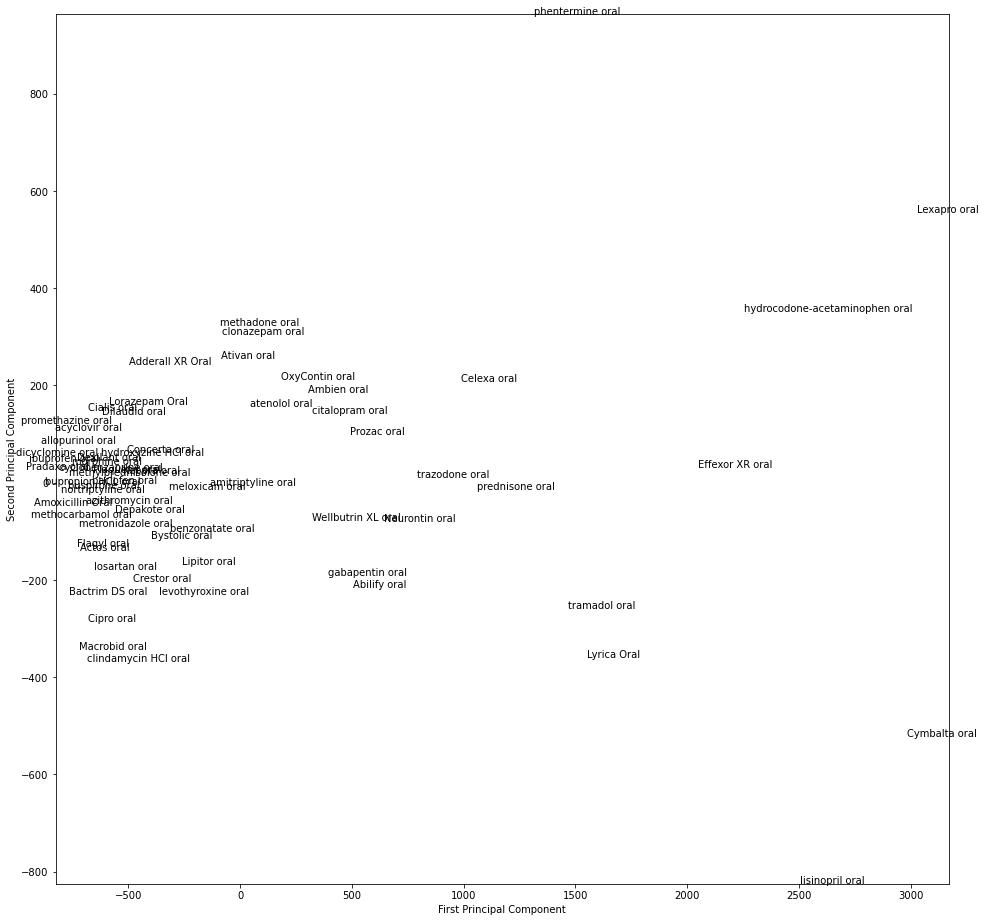

In [137]:
fig,ax1 = plt.subplots(figsize =(16, 16))

ax1.set_xlim(X_PCA[:,1].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)

for i,name in enumerate(medications["Drug Name"]):
    ax1.annotate(name, (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=10)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

[9.27801777e-01 5.10863221e-02 1.10091706e-02 5.87948863e-03
 1.57746173e-03 1.13826115e-03 6.23218040e-04 4.68180382e-04
 1.42014824e-04 9.75862411e-05 7.63731711e-05 5.68891853e-05
 4.32113079e-05 4.57151380e-08 1.58243520e-33 5.34525080e-34]


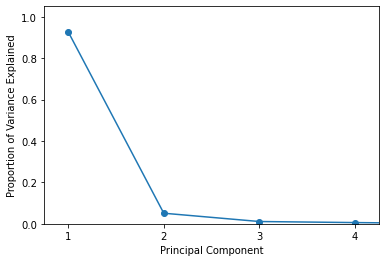

In [105]:
# Variance ratio of the four principal components
var_ratio = pca_model.explained_variance_ratio_
print(var_ratio)

plt.plot(range(1,17), var_ratio, '-o')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.show()

We can see from the plot and the variance ratio scores that the first principal component explains > 90% of the data. Adding a second principal component only adds an additional 5% of variance and every component after that is much smaller. 

In [133]:
full_data2 = full_data.drop(["Drug_name", "Name", "Gender", "Duration", "Age_range","Patient_type", "condition", "Comments"], axis = 1)

X = full_data2
y = full_data["Drug_name"]

pca_model2 = PCA()
X_PCA2 = pca_model2.fit_transform(X)

pca_data2 = pd.DataFrame(X_PCA2, index = full_data["Drug_name"])
pca_data2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Drug_name,,,,,,,,,,,,,,,,,,
Abilify oral,623.021797,-215.892038,-170.499998,-21.747470,-0.929236,-35.112477,36.706827,11.834319,22.830841,7.774745,6.973064,6.222476,21.874585,1.929106,-0.216656,-0.008536,-1.415589e-12,1.565985e-12
Abilify oral,623.021466,-215.886324,-170.499842,-21.749914,-0.925542,-35.108768,36.699549,11.850917,22.803151,7.820886,6.978382,6.207739,21.883930,-1.755574,0.300007,0.909379,9.482675e-12,2.127955e-13
Abilify oral,623.021441,-215.885841,-170.499816,-21.750106,-0.925400,-35.108352,36.699006,11.852086,22.800814,7.823296,6.979194,6.207833,21.883815,-2.067346,-0.061071,-0.019279,-1.978756e-15,2.185729e-12
Abilify oral,623.021441,-215.885841,-170.499816,-21.750106,-0.925400,-35.108352,36.699006,11.852086,22.800814,7.823296,6.979194,6.207833,21.883815,-2.067346,-0.061071,-0.019279,-7.536813e-13,7.444253e-14
Abilify oral,623.021708,-215.890489,-170.499952,-21.748129,-0.928277,-35.111446,36.704872,11.838761,22.823334,7.786883,6.974597,6.218816,21.876892,0.929993,-0.177760,-0.011222,6.326982e-13,-6.095876e-13


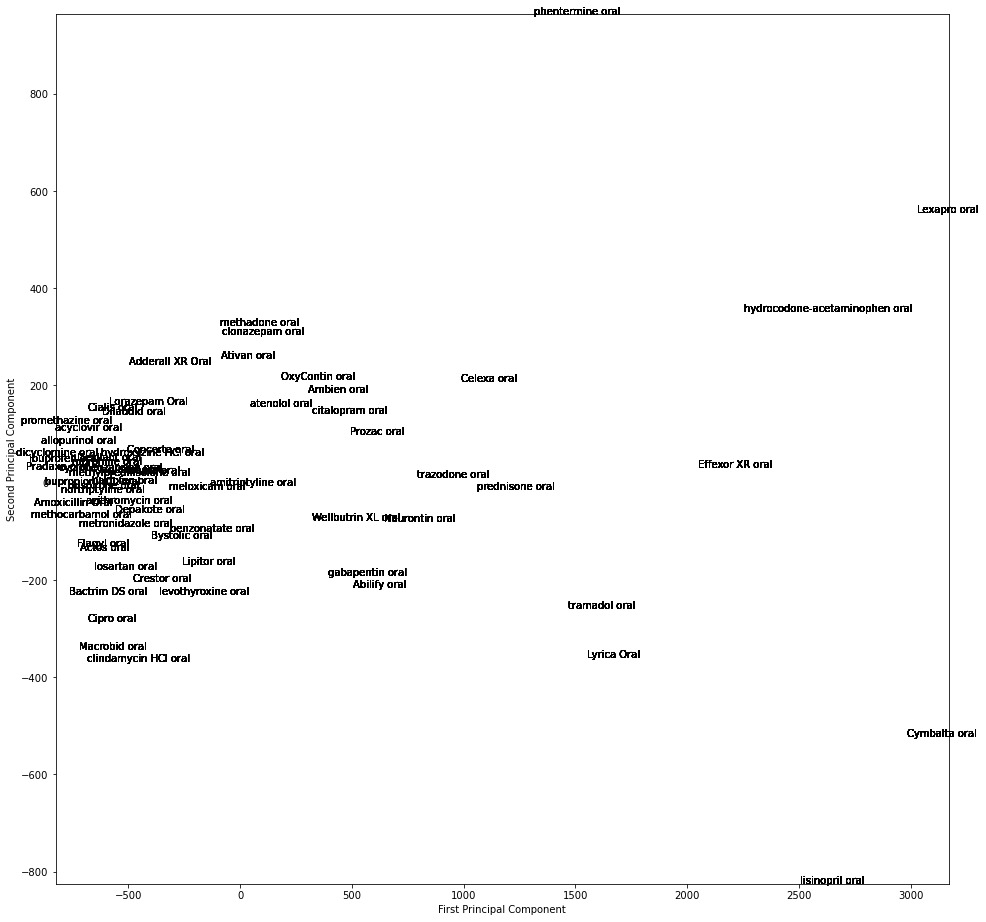

In [134]:
fig,ax1 = plt.subplots(figsize =(16, 16))

ax1.set_xlim(X_PCA2[:,1].min()-1,X_PCA2[:,0].max()+1)
ax1.set_ylim(X_PCA2[:,1].min()-1,X_PCA2[:,1].max()+1)

for i,name in enumerate(full_data["Drug_name"]):
    ax1.annotate(name, (X_PCA2[i,0], X_PCA2[i,1]), ha='center',fontsize=10)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

[9.27799916e-01 5.10863418e-02 1.10091485e-02 5.87947934e-03
 1.57746003e-03 1.13826008e-03 6.23219162e-04 4.68188653e-04
 1.42022438e-04 9.76003078e-05 7.63732020e-05 5.68898903e-05
 4.32114697e-05 1.81237738e-06 4.52363760e-08 3.11933342e-08
 6.53159012e-32 5.43153349e-33]


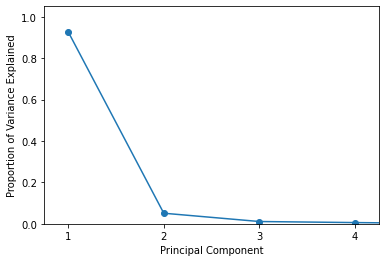

In [121]:
# Variance ratio of the four principal components
var_ratio = pca_model.explained_variance_ratio_
print(var_ratio)

plt.plot(range(1,19), var_ratio, '-o')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.show()

We can again see that > 90% of the data is explained by the first principal component, while all the others do not explain much of the variance. 

# K-Means Clustering

In [148]:
X = full_data2
y = full_data["Drug_name"]

y_pred = KMeans(n_clusters=2, n_init=1, init='random', max_iter=1).fit_predict(X)

kmeans_data = pd.DataFrame(y_pred, index = full_data["Drug_name"], columns = ["Cluster"])
kmeans_data.Cluster.unique()

array([0, 1], dtype=int32)

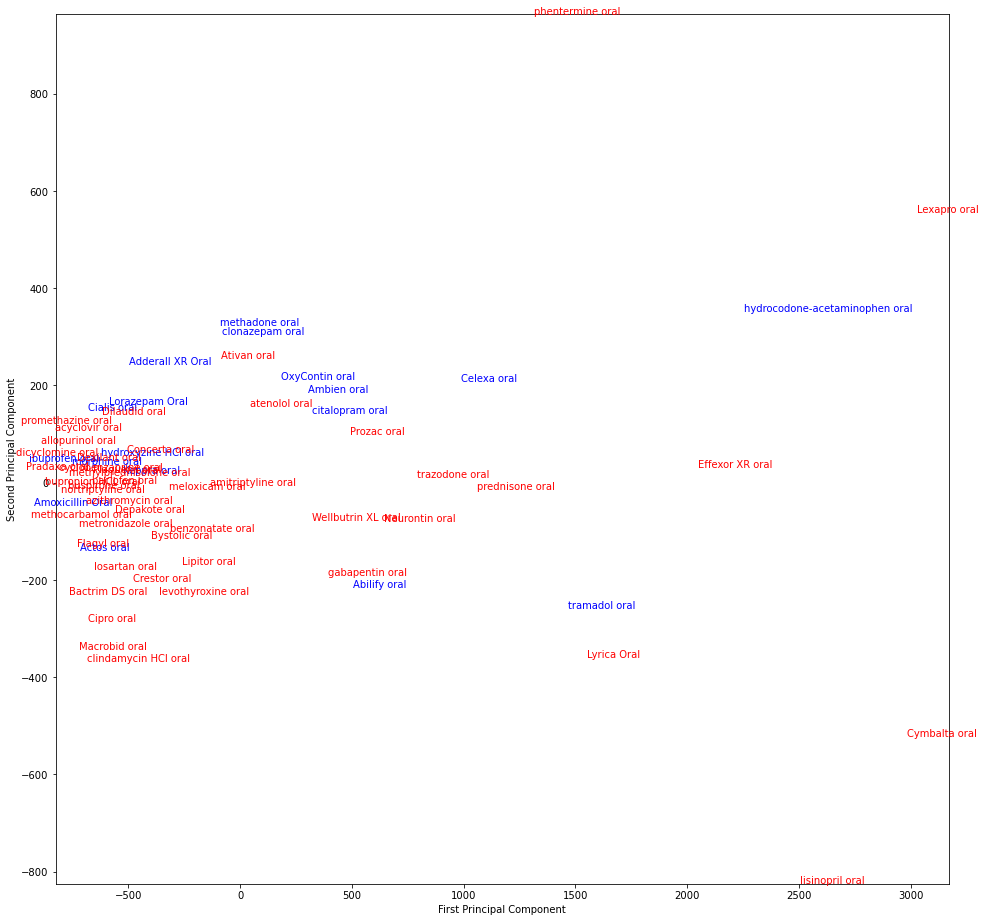

In [149]:
fig,ax1 = plt.subplots(figsize =(16, 16))

ax1.set_xlim(X_PCA[:,1].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)

for i,name in enumerate(medications["Drug Name"]):
    ax1.annotate(name, (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=10, color = colors[kmeans_data["Cluster"][i]])

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

We can see from our K-Means analysis that creating more than one cluster in the data does not result in a clear separation of the drugs. We cannot effectively distinguish between different drugs using the numeric data in our dataset. 